<a href="https://colab.research.google.com/github/IsaacGA123/Airbnb-analysis/blob/main/Airbnb_Marketplace_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Airbnb](https://raw.githubusercontent.com/interviewquery/takehomes/airbnb_1/airbnb_1/logo.png)

# TAKE-HOME CHALLENGE: Data Science - Analytics

Airbnb is a two-sided marketplace that matches guests to hosts. The
booking flow at Airbnb is as follows: a guest finds an available room
(listing) that they like, and then they contact the host. Once the guest
finds a listing they are interested in, there are three ways to send the
host an inquiry: `contact_me`, `book_it`, or `instant_book` (detailed at
the bottom of this document). Upon receiving the inquiry, the host can
then decide whether or not to accept the request (for `contact_me` and
`book_it` methods; `instant_book` is auto-accepted). One of our
goals at Airbnb is to increase bookings on our platform.

## Prompt

You are the first data scientist to join a cross-functional Product and
Operations team working to grow bookings in Rio de Janeiro. The team
asks you for help with the following:

1.  What key metrics would you propose to monitor over time the success
    of the team's efforts in improving the guest host matching process
    and why? Clearly define your metric(s) and explain how each is
    computed.

2.  What areas should we invest in to increase the number of successful
    bookings in Rio de Janeiro? What segments are doing well and what
    could be improved? ​ ​Propose 2-3 specific recommendations (business
    initiatives and product changes) that could address these
    opportunities. Demonstrate rationale behind each recommendation AND
    prioritize your recommendations in order of their estimated impact.

3.  There is also interest from executives at Airbnb in the work you
    are doing, and a desire to understand the broader framing of the
    challenge of matching supply and demand, thinking beyond the data
    provided. What other research, experiments, or approaches could help
    the company get more clarity on the problem?

## Assignment
S​ummarize your recommendations in response to the questions above in a Jupyter Notebook intended for
the Head of Product and VP of Operations (who is not technical). Include
an organized appendix sharing the details of your work conducted for the
Rio team, that would be useful for the data team to understand your
work.






## Grading

Your assignment will be judged according to:

1.  The analytical approach and clarity of your graphs, tables,
    visualizations,

2.  The data decisions you made and reproducibility of the analysis,

3.  Strength of recommendations, prioritizations, and rationale behind
    those,

4.  The narrative of your presentation and ability to effectively
    communicate to non-technical executives, 5) How well you followed
    the directions.

## Data Provided

### `contacts.csv`​​
Contains a row for every time that a user makes an
inquiry for a stay at a listing in Rio de Janeiro.

-   `id_guest_anon` -​ id of the guest making the inquiry.

-   `id_host_anon` -​ id of the host of the listing to which the inquiry is
    made.

-   `id_listing_anon` -​ id of the listing to which the inquiry is made.

-   `ts_interaction_first` -​ UTC timestamp of the moment the inquiry is
    made.

-   `ts_reply_at_first` -​ UTC timestamp of the moment the host replies to
    the inquiry, if so.
- `ts_accepted_at_first` - UTC timestamp of the
    moment the host accepts the inquiry, if so.​
    
-    `ts_booking_at` - UTC
    timestamp of the moment the booking is made, if so.

-   `ds_checkin_first` -​ Date stamp of the check-in date of the inquiry.

-   `ds_checkout_first` ​- Date stamp of the check-out date of the inquiry.

-   `m_guests` ​- The number of guests the inquiry is for.

-   `m_interactions` -​ The total number of messages sent by both the guest
    and host.

-   `m_first_message_length_in_characters` -​ Number of characters in the
    first message sent by the guest, if a message was sent

-   `contact_channel_first` -​ The contact channel through which the
    inquiry was made. One of {contact_me, book_it, instant_book}. \*See
    bottom of page for more detail\*

-   `guest_user_stage_first` ​- Indicates whether the user has made a
    booking before sending the inquiry ("past booker"). If the user has
    not booked before, then the user is a new user.

### `listings.csv`
Contains data for every listing in the market

-   `id_listing_anon` ​- anonymized id of the listing

-   `room_type` -​ indicates whether the room is an entire home, private
    room, or shared room

-   `listing_neighborhood` -​ the neighborhood of the listing

-   `total_reviews` -​ the total number of reviews of the listing (at the
    time the data was pulled).

### Users
Contains data for every user

-   `id_user_anon` ​- anonymized id of user

-   `words_in_user_profile` - the number of words in the "about me"
    section of the user's Airbnb profile (at the time of contact)

-   `country` -​ origin country of the user

## Further Information

There are three ways to book a listing on Airbnb:

1)  `contact_me` -​ The guests writes a message to the host to inquire
    about the listing. The host has the option to 1) pre-​approve the
    guest to book their place, or 2) they can reject, or 3) they can
    write a free text message with no explicit acceptance or rejection.
    If the host pre-​approves, the guest can then go ahead and click to
    make the booking (but is not obligated to).

2)  `book_it` ​- The guest puts money down to book the place directly,
    but the host has to accept the reservation request. If the host
    accepts, the booking happens automatically. If you have used Airbnb
    before, this shows up as a button labeled "Request to book".

3)  `instant_book`​ -​ The guest books the listing directly, without any
    need for the host to accept or reject actively (it is auto​-accepted
    by the host). This shows up as a button labeled "Book".

### Note​
A host can opt-in to the `instant_book` feature. If a host
does so, a guest can use the `contact_me` or `instant_book` channels
for booking that particular listing, but cannot use the `book_it`
functionality. Alternatively, if a host does not opt in, a guest can use
the `contact_me` or `book_it` channels only. We suggest that you
browse the Airbnb website and look at listings to see the different ways
that you can message a host.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone --branch airbnb_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/airbnb_1
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1968, done.
remote: Counting objects: 100% (1968/1968), done.
remote: Compressing objects: 100% (1222/1222), done.
remote: Total 1968 (delta 755), reused 1933 (delta 729), pack-reused 0 (from 0)
Receiving objects: 100% (1968/1968), 299.41 MiB | 16.53 MiB/s, done.
Resolving deltas: 100% (755/755), done.
/content/takehomes/airbnb_1
contacts.csv  file.json  listings.csv  logo.png  takehomefile.ipynb  users.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [4]:
file_paths = ["/content/takehomes/airbnb_1/contacts.csv",
              "/content/takehomes/airbnb_1/listings.csv",
              "/content/takehomes/airbnb_1/users.csv"
]

for file in file_paths:
    df = pd.read_csv(file, header = 0)
    print(f"Contents of {file}:\n", df.head())


Contents of /content/takehomes/airbnb_1/contacts.csv:
                           id_guest_anon                          id_host_anon  \
0  da8656a1-51af-4f38-b1c4-94be1f585157  5426897d-960d-4013-9e38-606ae746793c   
1  8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37  f30417c5-6df4-45ac-bfc2-6ad1cce398ab   
2  ebcd83ba-bda1-47eb-9680-2dd04ccf3988  13cbf50a-3272-45d4-9866-a06b6ea1b99a   
3  b0af8848-fe2a-4ef1-991e-26ab3066feb3  01614601-d5a4-4776-ab9b-c10d3b865bf0   
4  5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2  f2fed6f3-4c5c-453d-9e64-37c62b8bd06d   

                        id_listing_anon   ts_interaction_first  \
0  a408a8b2-0d44-4513-a611-3736d0409bb2    2016-04-21 02:55:53   
1  e387c705-0aeb-464c-9375-ece63be6f006    2016-02-16 22:14:01   
2  d1eb1960-938f-4305-a353-51e224414dd4    2016-01-27 23:33:38   
3  855f6779-346c-45fc-a64b-ea133250ca7a    2016-05-05 14:42:52   
4  f2928a59-c5e7-42b2-9c37-240a40f38dc0  2016-06-23 03:09:25.0   

       ts_reply_at_first   ts_accepted_at_first          ts_b

In [5]:
contacts_df = pd.read_csv(file_paths[0])
listings_df = pd.read_csv(file_paths[1])
users_df = pd.read_csv(file_paths[2])


In [6]:
duplicates = contacts_df[contacts_df.duplicated()]

contacts_df = contacts_df.drop_duplicates()

print(duplicates)

Empty DataFrame
Columns: [id_guest_anon, id_host_anon, id_listing_anon, ts_interaction_first, ts_reply_at_first, ts_accepted_at_first, ts_booking_at, ds_checkin_first, ds_checkout_first, m_guests, m_interactions, m_first_message_length_in_characters, contact_channel_first, guest_user_stage_first]
Index: []


In [7]:
duplicates_2 = listings_df[listings_df.duplicated()]

listings_df = listings_df.drop_duplicates()

print(duplicates_2)

Empty DataFrame
Columns: [id_listing_anon, room_type, listing_neighborhood, total_reviews]
Index: []


In [8]:
duplicates_3 = users_df[users_df.duplicated()]

users_df = users_df.drop_duplicates()

print(duplicates_3)

                               id_user_anon country  words_in_user_profile
31457  c895617d-4331-41ea-9786-4430a1a3a606      BR                     37
31458  069854c4-cd31-47cf-bbe4-aa6e8c30dc1b      BR                     46
31459  a1520096-7b83-4e04-ad8b-6e242098eca2      BR                     28
31460  d45764be-8e3b-4a22-9af1-6658a1480fd6      BR                      8
31461  eefce468-c5a6-4c67-8dae-23005a88644f      BR                    144
...                                     ...     ...                    ...
31520  e60ee532-f55c-474c-8fb7-1ff16b3b6023      BR                    100
31521  33187bc0-2544-4937-84f1-56a808057c36      BR                    121
31522  f371e503-9ebf-4ba9-a6a9-2f7c11279c73      BR                     11
31523  66120016-6a90-42b8-8d14-acee4dbe3db4      BR                      1
31524  43fb19ca-bce5-4bab-9aac-c7c652b9c0a5      BR                    185

[68 rows x 3 columns]


In [9]:
pd.options.mode.copy_on_write = True


contacts_df.dropna(subset=["ts_reply_at_first", "ts_accepted_at_first", "ts_booking_at"], axis=0, inplace=True)

listings_df.dropna(subset=["room_type", "listing_neighborhood", "total_reviews"], axis=0, inplace=True)

users_df.dropna(subset=["words_in_user_profile", "country"], axis=0, inplace=True)


for df in [contacts_df, listings_df, users_df]:
    df.reset_index(drop=True, inplace=True)


print(contacts_df[["ts_reply_at_first", "ts_accepted_at_first", "ts_booking_at"]].isna().sum())
print(listings_df[["room_type", "listing_neighborhood", "total_reviews"]].isna().sum())
print(users_df[["words_in_user_profile", "country"]].isna().sum())

ts_reply_at_first       0
ts_accepted_at_first    0
ts_booking_at           0
dtype: int64
room_type               0
listing_neighborhood    0
total_reviews           0
dtype: int64
words_in_user_profile    0
country                  0
dtype: int64


In [10]:
merged_df = pd.merge(contacts_df, listings_df[['id_listing_anon', 'total_reviews', 'listing_neighborhood', 'room_type']],
                     on='id_listing_anon', how='left')
merged_df = pd.merge(merged_df, users_df[['id_user_anon','words_in_user_profile','country']],
                     left_on='id_guest_anon', right_on='id_user_anon', how='left')

In [11]:
brazil_df = merged_df[merged_df['country'] == 'BR']

print(brazil_df['country'].unique())

['BR']


In [12]:
brazil_df.loc[:, ('total_reviews')].astype("int")

,total_reviews
1,1
16,26
17,66
18,18
19,11
...,...
11577,7
11580,20
11582,17
11583,22


In [13]:
brazil_df = brazil_df[brazil_df['total_reviews'] >= 0]

In [14]:
brazil_df['ts_accepted_at_first'] = pd.to_datetime(brazil_df['ts_accepted_at_first']).dt.date
brazil_df['ts_interaction_first'] = pd.to_datetime(brazil_df['ts_interaction_first'], format='mixed').dt.date
brazil_df['ts_reply_at_first'] = pd.to_datetime(brazil_df['ts_reply_at_first']).dt.date
brazil_df['ts_booking_at'] = pd.to_datetime(brazil_df['ts_booking_at']).dt.date

In [15]:
brazil_df = brazil_df[brazil_df['guest_user_stage_first'] != '-unknown-']
brazil_df = brazil_df[brazil_df['listing_neighborhood'] != '-unknown-']


In [16]:
brazil_df['book_it'] = brazil_df['contact_channel_first'] == 'book_it'
brazil_df['instant_book'] = brazil_df['contact_channel_first'] == 'instant_book'
brazil_df['contact_me'] = brazil_df['contact_channel_first'] == 'contact_me'

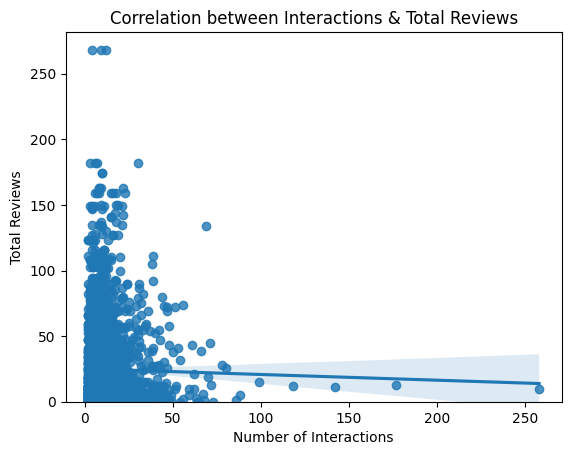

In [17]:
sns.regplot(x='m_interactions', y='total_reviews', data=brazil_df)
plt.ylim(0,)

plt.xlabel("Number of Interactions")
plt.ylabel("Total Reviews")
plt.title("Correlation between Interactions & Total Reviews")

plt.show()

In [18]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(brazil_df['m_interactions'], brazil_df['total_reviews'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)


The Pearson Correlation Coefficient is -0.01690356139623215 with a P-value of P = 0.4007756527981471


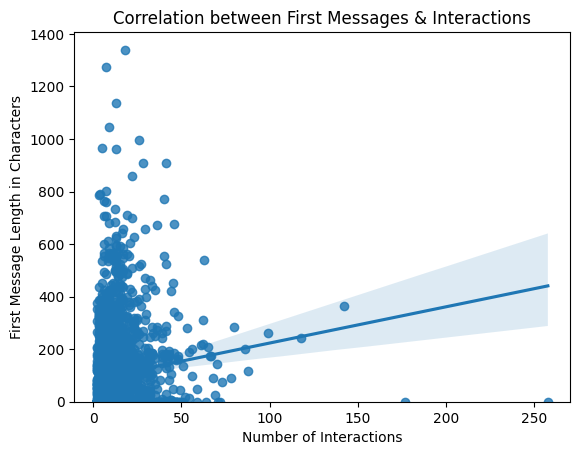

In [19]:
sns.regplot(x='m_interactions', y='m_first_message_length_in_characters', data=brazil_df)
plt.ylim(0,)


plt.xlabel("Number of Interactions")
plt.ylabel("First Message Length in Characters")
plt.title("Correlation between First Messages & Interactions")

plt.show()

In [20]:
pearson_coef, p_value = stats.pearsonr(contacts_df['m_interactions'], contacts_df['m_first_message_length_in_characters'])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.08299737861947011 with a P-value of P = 3.601532958907155e-19


In [21]:
brazil_df = brazil_df[brazil_df['m_interactions'] <=50]

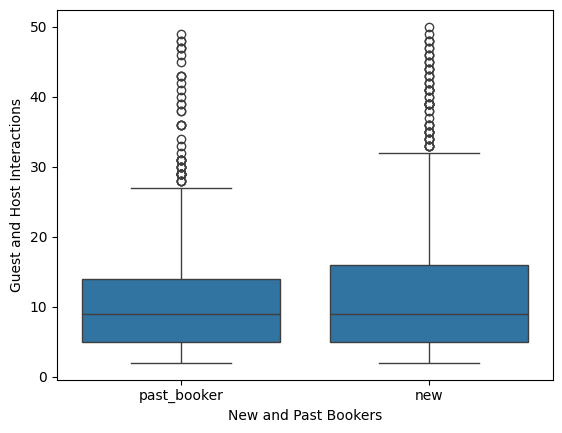

In [22]:
sns.boxplot(x='guest_user_stage_first', y='m_interactions', data=brazil_df)

plt.ylabel('Guest and Host Interactions')
plt.xlabel('New and Past Bookers')

plt.show()

In [23]:
fig = px.histogram(brazil_df, x='listing_neighborhood', y='total_reviews',
                   title='Distribution of Total Reviews by Neighborhood',
                   labels={'listing_neighborhood': 'Neighborhoods', 'total_reviews': 'Total Reviews'},
                   nbins=30,
                   histfunc='max'
                  )
fig.show()

In [24]:
book_it_success_rate = brazil_df[brazil_df['book_it'] == True]['ts_booking_at'].notna().mean()
other_success_rate = brazil_df[brazil_df['book_it'] == False]['ts_booking_at'].notna().mean()


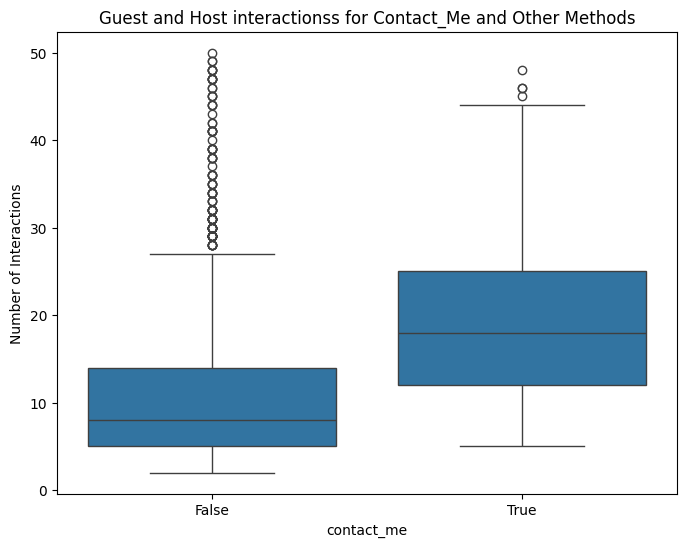

In [25]:
contact_me_interactions = brazil_df[brazil_df['contact_me'] == True]['m_interactions']
other_contact_me = brazil_df[brazil_df['contact_me'] == False]['m_interactions']

plt.figure(figsize=(8,6))
sns.boxplot(x='contact_me', y='m_interactions', data=brazil_df)
plt.title("Guest and Host interactionss for Contact_Me and Other Methods")
plt.xlabel("contact_me")
plt.ylabel("Number of Interactions")

plt.show()

<Axes: xlabel='book_it', ylabel='words_in_user_profile'>

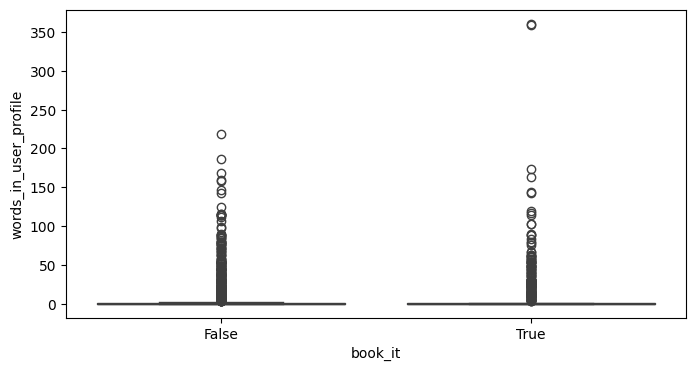

In [26]:
book_it_user_profile = brazil_df[brazil_df['book_it'] == True]['words_in_user_profile']
other_user_profile = brazil_df[brazil_df['book_it'] == False]['words_in_user_profile']

plt.figure(figsize=(8,4))
sns.boxplot(x='book_it', y='words_in_user_profile', data=brazil_df)

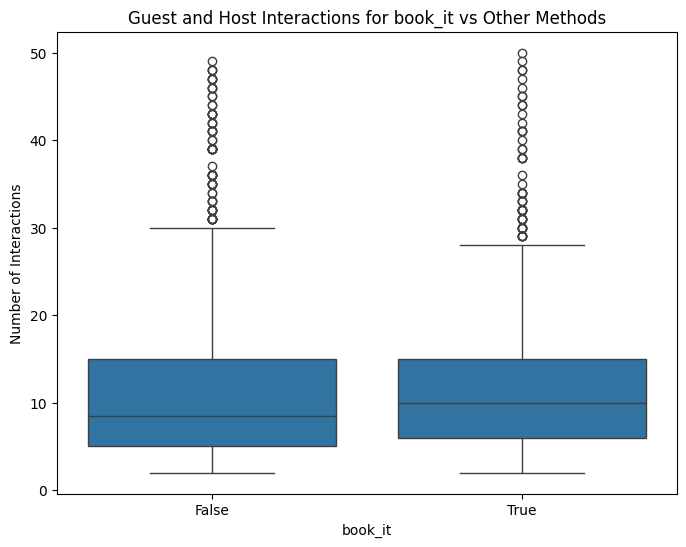

In [27]:
book_it_interactions = brazil_df[brazil_df['book_it'] == True]['m_interactions']
other_interactions = brazil_df[brazil_df['book_it'] == False]['m_interactions']

plt.figure(figsize=(8, 6))
sns.boxplot(x='book_it', y='m_interactions', data=brazil_df)
plt.title('Guest and Host Interactions for book_it vs Other Methods')
plt.xlabel('book_it')
plt.ylabel('Number of Interactions')
plt.show()

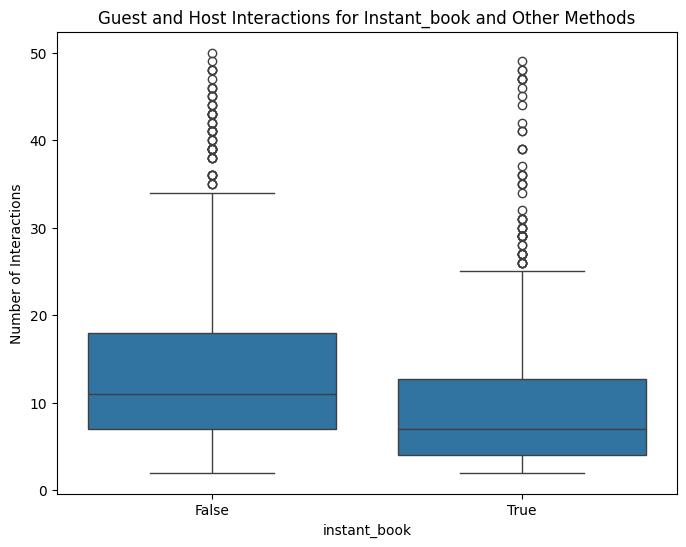

In [28]:
instant_book_interactions = brazil_df[brazil_df['instant_book'] == True]['m_interactions']
other_instant_books = brazil_df[brazil_df['instant_book'] == False]['m_interactions']

plt.figure(figsize=(8,6))
sns.boxplot(x='instant_book', y='m_interactions', data=brazil_df)
plt.title("Guest and Host Interactions for Instant_book and Other Methods")
plt.xlabel("instant_book")
plt.ylabel("Number of Interactions")

plt.show()

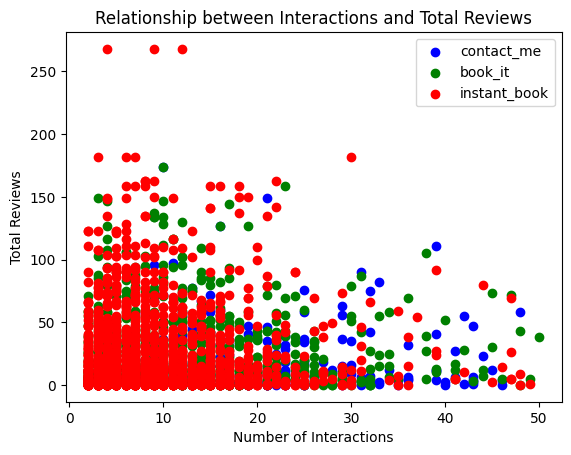

In [29]:
booking_methods = ['contact_me', 'book_it', 'instant_book']
colors = ['blue', 'green', 'red']

for method, color in zip(booking_methods, colors):
    subset = brazil_df[brazil_df['contact_channel_first'] == method]
    plt.scatter(subset['m_interactions'], subset['total_reviews'], c=color, label=method)

plt.xlabel('Number of Interactions')
plt.ylabel('Total Reviews')
plt.title('Relationship between Interactions and Total Reviews')
plt.legend()
plt.show()

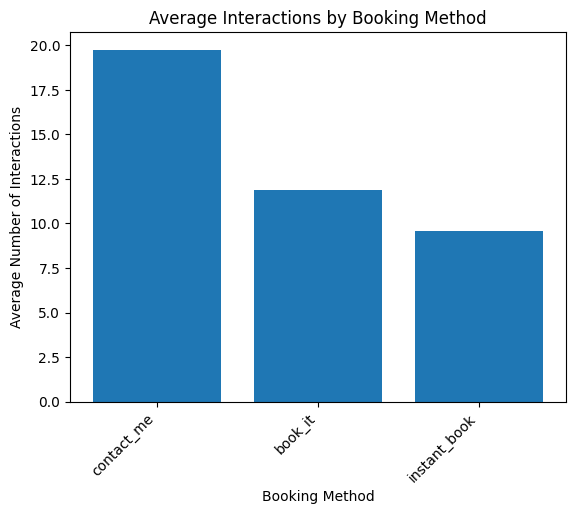

In [30]:
booking_methods = ['contact_me', 'book_it', 'instant_book']
average_interactions = [brazil_df[brazil_df['contact_channel_first'] == method]['m_interactions'].mean() for method in booking_methods]

plt.bar(booking_methods, average_interactions)
plt.xlabel('Booking Method')
plt.ylabel('Average Number of Interactions')
plt.title('Average Interactions by Booking Method')
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
brazil_df.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,guest_user_stage_first,total_reviews,listing_neighborhood,room_type,id_user_anon,words_in_user_profile,country,book_it,instant_book,contact_me
1,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23,2016-06-23,2016-06-23,2016-06-23,2016-08-19,2016-08-21,3.0,...,past_booker,1.0,Ipanema,Entire home/apt,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,1,BR,False,True,False
17,1a52acfd-100d-4140-a632-19c091176134,dcea389e-486d-4dc9-98f3-9f341d5b3a4d,620bf58b-e385-4193-9350-98443cb3d242,2016-06-05,2016-06-05,2016-06-05,2016-06-05,2016-06-18,2016-06-19,2.0,...,new,66.0,Copacabana,Entire home/apt,1a52acfd-100d-4140-a632-19c091176134,1,BR,False,True,False
19,9cab4314-d784-4560-88ec-a3fbfe38e445,b6226ede-df43-430e-892d-552b74918ee0,44b2db0c-3e5a-4bdc-9843-df7913a033a0,2016-06-20,2016-06-20,2016-06-20,2016-06-20,2016-07-05,2016-07-15,2.0,...,new,11.0,Copacabana,Entire home/apt,9cab4314-d784-4560-88ec-a3fbfe38e445,0,BR,False,True,False
23,aec048ba-361b-4359-b1fa-9477c7933494,e2e27ea2-4ec3-4441-b517-021888609178,ea356fca-e04b-4ecf-892e-9bd6af79db16,2016-01-20,2016-01-20,2016-01-20,2016-01-20,2016-02-06,2016-02-11,1.0,...,new,1.0,Glória,Shared room,aec048ba-361b-4359-b1fa-9477c7933494,0,BR,True,False,False
24,487623c7-f91f-4b85-93e6-926459b63587,b87622ba-0bdd-4f69-aba5-9b3f52de74ca,a7989abe-a31b-4ad0-b874-c08f75782627,2016-05-24,2016-05-24,2016-05-26,2016-05-26,2016-07-02,2016-07-03,2.0,...,past_booker,13.0,Lapa,Entire home/apt,487623c7-f91f-4b85-93e6-926459b63587,1,BR,True,False,False


In [32]:
avg_interactions = brazil_df.groupby('guest_user_stage_first')['m_interactions'].mean().reset_index()
fig = px.bar(avg_interactions, x='guest_user_stage_first', y='m_interactions',
             title='Average Number of Interactions by User Stage')
fig.show()

In [33]:
booking_counts = brazil_df['contact_channel_first'].value_counts()
fig = px.pie(booking_counts, values=booking_counts.values, names=booking_counts.index,
             title='Distribution of Booking Methods')
fig.show()

In [34]:

neighborhood_bookings = brazil_df['listing_neighborhood'].value_counts().reset_index()
neighborhood_bookings.columns = ['listing_neighborhood', 'booking_count']
fig = px.bar(neighborhood_bookings, x='listing_neighborhood', y='booking_count',
             title='Number of Bookings per Neighborhood')
fig.show()

In [35]:
brazil_df['time_to_booking'] = (pd.to_datetime(brazil_df['ts_booking_at']) - pd.to_datetime(brazil_df['ts_interaction_first'])).dt.days

fig = px.box(brazil_df, x='contact_channel_first', y='time_to_booking',
             title='Time to Booking by Booking Method',
             color='contact_channel_first',
             labels={'contact_channel_first': 'Booking Method',
                     'time_to_booking': 'Time to Booking (Days)'})
fig.show()

In [36]:
avg_interactions = brazil_df.groupby('contact_channel_first')['m_interactions'].mean().reset_index()
avg_interactions.columns = ['Booking Method', 'Average Interactions']

fig = px.bar(avg_interactions, x='Booking Method', y='Average Interactions',
             title='Average Interactions by Booking Method',
             color='Booking Method')
fig.show()

In [37]:
fig = px.box(brazil_df, x='contact_channel_first', y='m_first_message_length_in_characters',
             title='Distribution of First Message Length by Booking Method',
             color='contact_channel_first',
             labels={'contact_channel_first': 'Booking Method',
                     'm_first_message_length_in_characters': 'First Message Length'})
fig.show()

In [38]:
fig = px.histogram(brazil_df, x='guest_user_stage_first', color='contact_channel_first',
                   title='Booking Method Preference by User Stage',
                   barmode='stack',
                   labels={'guest_user_stage_first': 'User Stage',
                           'contact_channel_first': 'Booking Method'})
fig.show()

In [39]:
brazil_df.to_csv('airbnb_data.csv', index=False)